In [1]:
import Pkg; Pkg.activate("..\\.")
using WaterLily
include("..\\examples\\TwoD_plots.jl")
gr(show = :ijulia)

 Activating environment at `C:\Users\admin\Documents\GitHub\WaterLily\Project.toml`
┌ Info: Precompiling WaterLily [ed894a53-35f9-47f1-b17f-85db9237eebd]
└ @ Base loading.jl:1278


Plots.GRBackend()

In [2]:
function scal_init(n,m)
    f = zeros(n,m)
    f[n÷4+10:3*n÷4+10, m-n÷4-5:m-5] .= 1
    
    u = apply(n,m,2) do i,vx
        x,y = @. (vx-1.5)*π/(m-2)     # scaled coordinates
        i==1 && return  sin(x)*cos(y) # u_x
        i==2 && return -cos(x)*sin(y) # u_y
    end
    return f,u
end
scal_init(n)=scal_init(n,n)

scal_init (generic function with 2 methods)

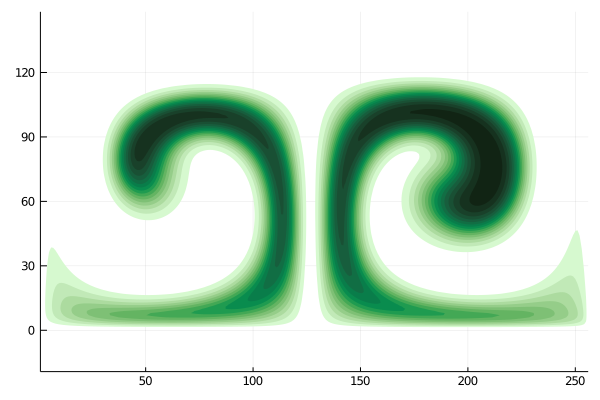

In [4]:
n = 8; f,u = scal_init(2^n,2^(n-1))
r = similar(f)

t = 0; Δt=0.25; t_end = 2^(n+0.5)
gr(show = :ijulia)
while t < t_end
    t += Δt
    r .= 0
    WaterLily.tracer_transport!(r,f,u)
    @inside f[I] = f[I]+Δt*r[I]
    if t%2^(n-5)<=Δt
        flood(f,clim=(0.05,1),fill=(true,palette(:algae)),legend=false)
    end
end